# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

## **Response**

The dataset represents 17 marketing campaigns that occurred between 2008 and 2010**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # To suppress some warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
df = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/bank-additional-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Printing number of count of each unique value in each column

cat_col = list(df.select_dtypes("object").columns)
for column in cat_col:
    print(df[column].value_counts().reset_index())
    print("-" * 50)

              job  count
0          admin.  10422
1     blue-collar   9254
2      technician   6743
3        services   3969
4      management   2924
5         retired   1720
6    entrepreneur   1456
7   self-employed   1421
8       housemaid   1060
9      unemployed   1014
10        student    875
11        unknown    330
--------------------------------------------------
    marital  count
0   married  24928
1    single  11568
2  divorced   4612
3   unknown     80
--------------------------------------------------
             education  count
0    university.degree  12168
1          high.school   9515
2             basic.9y   6045
3  professional.course   5243
4             basic.4y   4176
5             basic.6y   2292
6              unknown   1731
7           illiterate     18
--------------------------------------------------
   default  count
0       no  32588
1  unknown   8597
2      yes      3
--------------------------------------------------
   housing  count
0      yes  2157

## **Data Cleaning**
The target variable is categorical and will be converted to numeric. The dataset authors warned that the feature 'pdays' is highly correlated with 'no' and should be dropped, so we dropped it. The cleaned dataset had 19 features.

Many of the variables are categoricals which need to be numerically encoded prior to modeling, including the target feature "y". There were no duplicates or outliers. Several numeric features had skewed or discontinuous distributions and will be scaled.
While no null values are present in the dataset, missing data is represented by the category "unknown". The category value counts for each feature show that the percentage of "unknown" is low for most of the features. The exception is the feature "default", which is unknown for 26% of the data. Since we have a large dataset we will go ahead and drop all the cases with unknown/missing data, rather than using imputation.






In [46]:
#Convert target feature from string to numerical
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['y'].dtype

dtype('int64')

In [49]:
#Drop feature 'pdays' due to warning from authors
df.drop(columns='pdays', inplace=True)
df.shape

(41188, 20)

In [50]:
#Replace all "unknown" categorical entries with null values
df.replace("unknown", np.nan, inplace=True)
df.isna().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [51]:
# Drop all cases with missing values
df.dropna(inplace=True)
df.shape

(30488, 20)

In [52]:
#Sum of target feature yes and no
df['y'].value_counts()

,count
y,
0,26629
1,3859


In [53]:
# Calculate the success rate
success_rate = df['y'].mean()
print(f'Success rate: {success_rate}')

Success rate: 0.1265743899239045


## **Response**
We also want to look at the desciptive statistics for the numeric features and look for outliers and skewed distributions.


In [54]:
df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,261.714262,2.720150,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,103.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,181.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,321.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


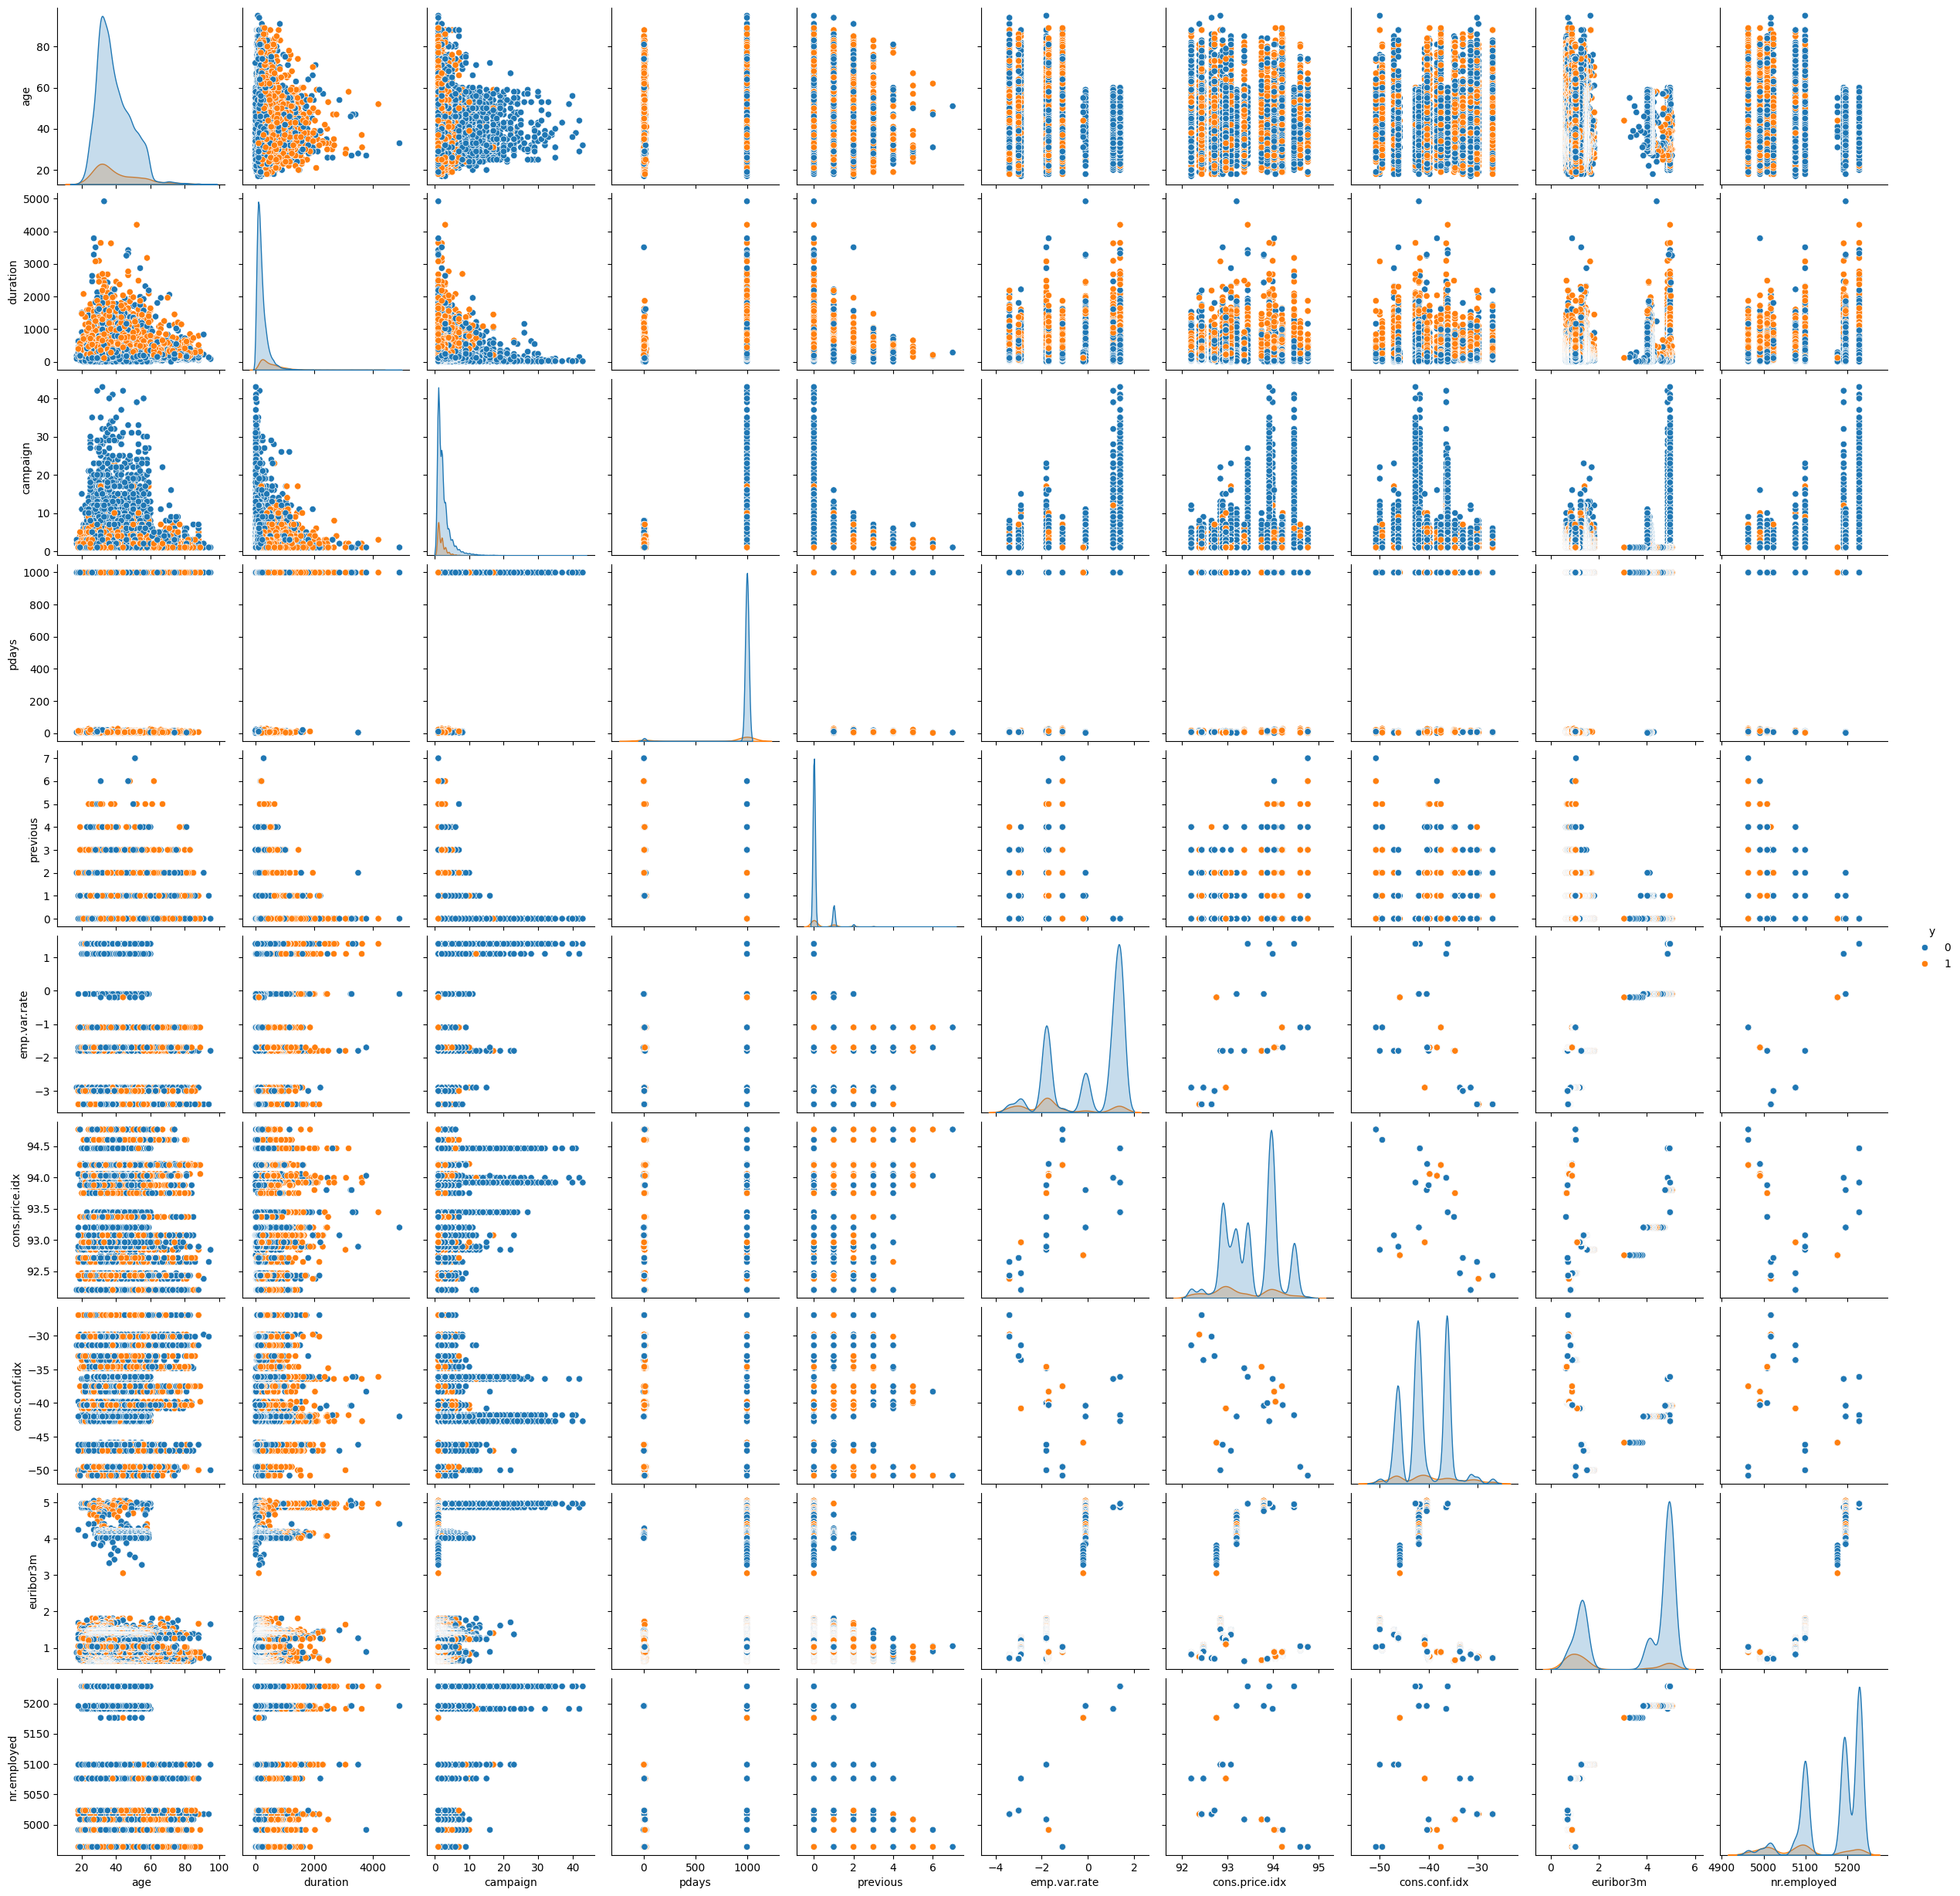

In [169]:
sns.pairplot(df, hue='y')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## **Response**
The business objective of this project is to identify the factors that most influence a successful campaign, as measured by the contact subscribing a term deposit (ie target='y'). Identifying the factors most related to success will allow better targeting of prospective clients and management of firm resources in marketing efforts, increasing efficiency and saving costs.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

## **Response**
A preprocessor was created to transform the independent features. Numerical features were regularized using StandardScalar and dummy variables were created from the categorical variables using OneHotEncoder.

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2, f_regression
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

#from sklearn.pipeline import plot_confusion_matrix



In [56]:
#Split data into target and independent features
X = df.drop('y', axis=1)
y = df['y']
print(X.shape)
print(y.shape)

(30488, 19)
(30488,)


In [57]:
# Define categorical and numerical features
categoric = X.select_dtypes(include=['object']).columns.tolist()
numeric = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print('Categorical columns:', categoric)
print('Numeric columns:', numeric)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numeric columns: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [58]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21341, 19)
(21341,)
(9147, 19)
(9147,)


## **Response**

The data was split into target and independent features, and then into training and test sets, with a ratio of 30% for testing.


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [59]:
#Estimate baseline model using DummyClassifier tool

dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.8717612331912102


## **Response**

A baseline model was calculated using the Dummy Classifier tool, and evaluated using an accuracy score. The baseline score was .87.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## **Logistic Regression Model**

In [60]:
#Preprocessor with scaling and dummy variables
preprocessor = ColumnTransformer(transformers=[
('Numeric', make_pipeline(StandardScaler()), numeric),
        ('Categorical', make_pipeline(OneHotEncoder()), categoric),
        ], verbose_feature_names_out=True, sparse_threshold=0)
preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'duration', 'campaign', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome'])])

In [61]:
#Logistic Regression Model
lr_pipe = Pipeline([('preprocessor', preprocessor),
            ('model', LogisticRegression())])
lr_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('model', LogisticRegression())])

In [62]:
#Fit model and make predictions, while logging the fit time
import time

start_time = time.time()

lr_pipe.fit(X_train, y_train)
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

end_time = time.time()
lr_time_taken = end_time - start_time

print(f'LR Time taken: {lr_time_taken}')


LR Time taken: 0.45473361015319824


### Problem 9: Score the Model

What is the accuracy of your model?

In [63]:
#Calculate evaluation metrics
lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)
lr_precision = precision_score(y_test, lr_test_preds)

print('Train Accuracy Score:', lr_train_accuracy)
print('Test Accuracy Score:', lr_test_accuracy)
print('Precision: ', lr_precision)
print(classification_report(y_test, lr_test_preds))

Train Accuracy Score: 0.9001452602970808
Test Accuracy Score: 0.89996720236143
Precision:  0.6743243243243243
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7974
           1       0.67      0.43      0.52      1173

    accuracy                           0.90      9147
   macro avg       0.80      0.70      0.73      9147
weighted avg       0.89      0.90      0.89      9147



## **Response**

The accuracy score for the logistic regression model was .90. The precision score was .92 for 'no' and .677 for 'yes'. Since we care more about accurate prediction of 'yes' outcomes, we will try to improve the model to identify explanatory factors.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## **K Nearest Neighbors Model**

In [64]:
#KNN Model
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [65]:
#Fit model and make predictions, while logging the fit time
start_time = time.time()

knn_pipe.fit(X_train, y_train)
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

end_time = time.time()
knn_time_taken = end_time - start_time

print(f'KNN Time taken: {knn_time_taken}')


KNN Time taken: 6.562840461730957


In [66]:
#Calculate evaluation metrics
knn_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn_precision = precision_score(y_test, knn_test_preds)

print('Train Accuracy Score:', knn_train_accuracy)
print('Test Accuracy Score:', knn_test_accuracy)
print('Precision: ', knn_precision)
print(classification_report(y_test, knn_test_preds))

Train Accuracy Score: 0.921465723255705
Test Accuracy Score: 0.889909259866623
Precision:  0.6024691358024692
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7974
           1       0.60      0.42      0.49      1173

    accuracy                           0.89      9147
   macro avg       0.76      0.69      0.72      9147
weighted avg       0.88      0.89      0.88      9147



## **Decision Tree Model**

In [67]:
#Decision Tree Model
dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())
dt_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [68]:
#Fit model and make predictions, while logging the fit time
start_time = time.time()

dt_pipe.fit(X_train, y_train)
dt_train_preds = dt_pipe.predict(X_train)
dt_test_preds = dt_pipe.predict(X_test)

end_time = time.time()
dt_time_taken = end_time - start_time

print(f'Time taken: {dt_time_taken}')

Time taken: 0.3751826286315918


In [69]:
# Get the depth of the DecisionTreeClassifier from the pipeline

depth = dt_pipe.named_steps['decisiontreeclassifier'].get_depth()
print('Depth of tree:', depth)

Depth of tree: 25


In [70]:
#Calculate evaluation metrics
dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
dt_precision = precision_score(y_test, dt_test_preds)

print('Train Accuracy Score:', dt_train_accuracy)
print('Test Accuracy Score:', dt_test_accuracy)
print('Precision: ', dt_precision)
print(classification_report(y_test, dt_test_preds))


Train Accuracy Score: 1.0
Test Accuracy Score: 0.8782114354433147
Precision:  0.5248107653490328
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7974
           1       0.52      0.53      0.53      1173

    accuracy                           0.88      9147
   macro avg       0.73      0.73      0.73      9147
weighted avg       0.88      0.88      0.88      9147



## **Support Vector Classifier Model**

In [71]:
#Support Vector Classifier Model
svc_pipe = make_pipeline(preprocessor, SVC())
svc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('svc', SVC())])

In [72]:
#Fit model and make predictions, while logging the fit time
start_time = time.time()

svc_pipe.fit(X_train, y_train)
svc_train_preds = svc_pipe.predict(X_train)
svc_test_preds = svc_pipe.predict(X_test)

end_time = time.time()
svc_time_taken = end_time - start_time

print(f'Time taken: {svc_time_taken}')


Time taken: 26.928579330444336


In [73]:
#Calculate evaluation metrics
svc_train_accuracy = accuracy_score(y_train, svc_train_preds)
svc_test_accuracy = accuracy_score(y_test, svc_test_preds)
svc_precision = precision_score(y_test, svc_test_preds)

print('Train Accuracy Score:', svc_train_accuracy)
print('Test Accuracy Score:', svc_test_accuracy)
print('Precision: ', svc_precision)
print(classification_report(y_test, svc_test_preds))

Train Accuracy Score: 0.9161707511363104
Test Accuracy Score: 0.9005138296709304
Precision:  0.6886657101865137
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7974
           1       0.69      0.41      0.51      1173

    accuracy                           0.90      9147
   macro avg       0.80      0.69      0.73      9147
weighted avg       0.89      0.90      0.89      9147



In [74]:
#Summary Table of Model Accuracy

res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'Train score': [lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svc_train_accuracy],
           'Test score': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svc_test_accuracy],
            'Precision': [lr_precision, knn_precision, dt_precision, svc_precision],
           'Average fit time': [lr_time_taken, knn_time_taken, dt_time_taken, svc_time_taken]}
results_df = pd.DataFrame(res_dict).set_index('Model')

print(results_df.shape)

(4, 4)


## **Preliminary Results**
First, the K Nearest Neighbors classification method was tried. The KNN accuracy score was .89 and precision was .61, so it was not a better classifier.

Next, a Decision Tree method was tried. The DT accuracy score was .88 and precision score was .51, meaning that it did a much worse job.

Finally, a Support Vector Classifier method was tried. The SVC accuracy score was .90 and the precision score was .69. That means it outperformed the other models, just barely.


In [75]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
results_df.head()

,Train score,Test score,Precision,Average fit time
Model,,,,
Logistic Regression,0.90,0.90,0.67,0.45
KNN,0.92,0.89,0.60,6.56
Decision Tree,1.00,0.88,0.52,0.38
SVC,0.92,0.90,0.69,26.93


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## **Model Improvement**

We will take the following steps to improve the models, optimizing for precision:

*   Logistic Regression - Use SelectFromModel tool to look at model coefficients and see if any low value ones that could be dropped
*   K Nearest Neighbors model - grid search of k-values
*   Decision Tree - grid search of max tree depths
*   Support Vector Classification - grid search gamma values and kernels





## **Feature Selection**
Since this dataset has 54 predictor features, which can just add noise and slow down processing, it was important to identify the most and least important ones.  Reducing noise and degrees of freedom should help improve predictive power of the models.

Since the ‘yes’ class of interest was only 12% of the data, the parameter for class weight was set to ‘balanced’ to automatically adjust weights inversely proportional to class frequencies.

In [76]:
#Use Select from Model tool with logistic regression to identify most valuable features
from sklearn.feature_selection import SelectFromModel
lrs_pipe = Pipeline([('preprocessor', preprocessor),
            ('selector', SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', class_weight='balanced', random_state = 42)))])
lrs_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              class_weight='balanced',
                                                              penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear')))])

In [77]:
#Fit model and make predictions, while logging the fit time
import time

start_time = time.time()

lrs_pipe.fit_transform(X_train, y_train)

end_time = time.time()
lrs_time_taken = end_time - start_time

print(f'Time taken: {lrs_time_taken}')

Time taken: 1.4607160091400146


<Axes: ylabel='Feature'>

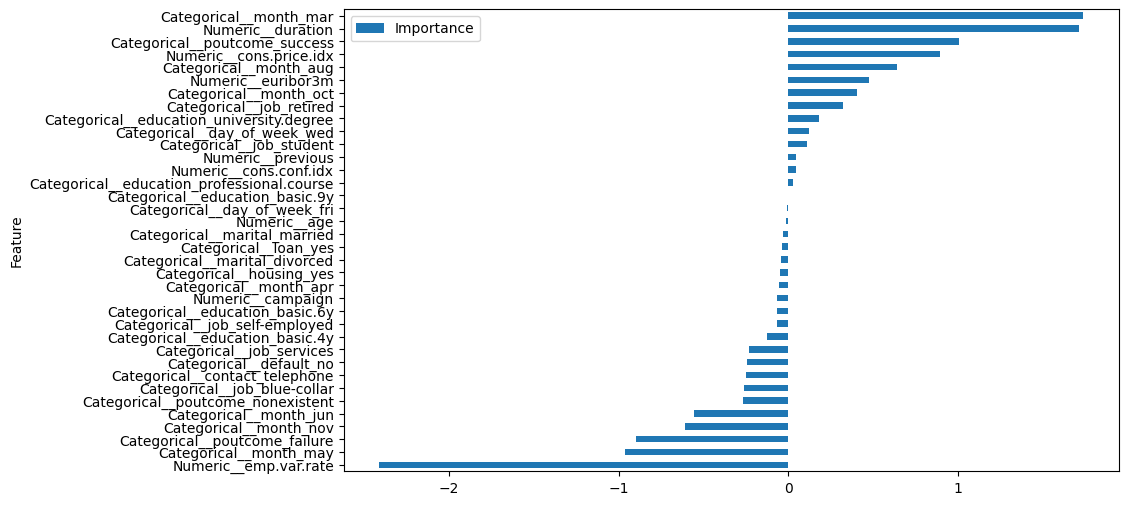

In [78]:
# Access the LogisticRegression estimator within the pipeline
selector = lrs_pipe.named_steps['selector']
lr_estimator = selector.estimator_

# Access the coefficients from the fitted estimator
coefficients = lr_estimator.coef_[0]

# Get the feature names from the preprocessor
feature_names = lrs_pipe.named_steps['preprocessor'].get_feature_names_out()

# Use get_support to get a boolean mask of the selected features
support = selector.get_support()

# Get the selected feature names
selected_features = feature_names[support]

# Get the coefficients corresponding to the selected features
selected_coefficients = coefficients[support]

#Plot coefficients in order of importance
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': np.float64(selected_coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [79]:
#Count of selected features
len(feature_importance)



36

In [84]:
#Names and values of top selected features influencing 'yes' outcome
feature_importance.tail(60)

,Feature,Importance
4,Numeric__emp.var.rate,-2.41
28,Categorical__month_may,-0.96
33,Categorical__poutcome_failure,-0.90
29,Categorical__month_nov,-0.61
26,Categorical__month_jun,-0.56
34,Categorical__poutcome_nonexistent,-0.27
8,Categorical__job_blue-collar,-0.26
23,Categorical__contact_telephone,-0.25
20,Categorical__default_no,-0.24
11,Categorical__job_services,-0.23


## **Feature Engineering**


*   Features that were not selected as having high predictive power were dropped.  
*   Features that were highly predictive of 'no' outcome were also dropped.      
*   Two features, 'job' and 'education', had many categories but only a few made it to the most important list. The two with the highest coefficient values were replaced by dummy variables reprenting just the most influential categories: University degree education and blue collar job.



In [82]:
#Create an indicator dummy for Univerity education, to eliminate other categories
X['university_degree'] = X['education'].apply(lambda x: 1 if x == 'university.degree' else 0)
X.university_degree.value_counts()

,count
university_degree,
0,20076
1,10412


In [85]:
#Drop features that are not contributing predictive power
X.drop (columns =['age', 'campaign', 'emp.var.rate', 'loan', 'housing', 'marital', 'contact', 'education', ], inplace = True)
X.head()

,job,default,month,day_of_week,duration,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,university_degree,blue_collar
0,housemaid,no,may,mon,261,0,nonexistent,93.99,-36.40,4.86,5191.00,0,0
2,services,no,may,mon,226,0,nonexistent,93.99,-36.40,4.86,5191.00,0,0
3,admin.,no,may,mon,151,0,nonexistent,93.99,-36.40,4.86,5191.00,0,0
4,services,no,may,mon,307,0,nonexistent,93.99,-36.40,4.86,5191.00,0,0
6,admin.,no,may,mon,139,0,nonexistent,93.99,-36.40,4.86,5191.00,0,0


In [87]:
# Re-Define categorical and numerical features
categoric = X.select_dtypes(include=['object']).columns.tolist()
numeric = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print('Categorical columns:', categoric)
print('Numeric columns:', numeric)

Categorical columns: ['job', 'default', 'month', 'day_of_week', 'poutcome']
Numeric columns: ['duration', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'university_degree']


In [88]:
#Revised Preprocessor
preprocessor2 = ColumnTransformer(transformers=[
('Numeric', make_pipeline(StandardScaler()), numeric),
        ('Categorical', make_pipeline(OneHotEncoder()), categoric),
        ], verbose_feature_names_out=True, sparse_threshold=0)
preprocessor2

ColumnTransformer(sparse_threshold=0,
                  transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['duration', 'previous', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m', 'nr.employed',
                                  'university_degree']),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['job', 'default', 'month', 'day_of_week',
                                  'poutcome'])])

In [89]:
#Re-Split the X data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(21341, 12)
(9147, 12)


## **Revised Logisitic Regression Model**

In [90]:
#Revised Logistic Regression Model
lr2_pipe = Pipeline([('preprocessor2', preprocessor2),
            ('model', LogisticRegression())])
lr2_pipe


Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'university_degree']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'default', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('model', LogisticRegression())])

In [91]:
#Fit model and make predictions, while logging the fit time
start_time = time.time()
lr2_pipe.fit(X_train, y_train)
lr2_train_preds = lr2_pipe.predict(X_train)
lr2_test_preds = lr2_pipe.predict(X_test)
end_time = time.time()
lr2_time_taken = end_time - start_time
print(f'Time taken: {lr2_time_taken}')

#Calculate evaluation metrics
lr2_train_accuracy = accuracy_score(y_train, lr2_train_preds)
lr2_test_accuracy = accuracy_score(y_test, lr2_test_preds)
lr2_precision = precision_score(y_test, lr2_test_preds)
print('Train Accuracy Score:', lr2_train_accuracy)
print('Test Accuracy Score:', lr2_test_accuracy)
print('Precision: ', lr2_precision)
print(classification_report(y_test, lr2_test_preds))


Time taken: 0.2791097164154053
Train Accuracy Score: 0.8986457991659248
Test Accuracy Score: 0.9006231551328304
Precision:  0.6793478260869565
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7974
           1       0.68      0.43      0.52      1173

    accuracy                           0.90      9147
   macro avg       0.80      0.70      0.73      9147
weighted avg       0.89      0.90      0.89      9147



## **Revised K Nearest Neighbors Model**

In [92]:
#Revised KNN Model
knn2_pipe = make_pipeline(preprocessor2, KNeighborsClassifier())
knn2_pipe



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'university_degree']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'default', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [93]:
#Define grid search for optimal k, optimizing for precision
params = {'kneighborsclassifier__n_neighbors': range(1, 20, 2)}
knn_grid = GridSearchCV(knn2_pipe, param_grid=params, scoring='precision')

In [94]:
#Conduct grid search and find best parameters
knn_grid.fit(X_train, y_train)
best_model = knn_grid.best_estimator_
best_params = knn_grid.best_params_

print(f'Best parameters: {best_params}')


Best parameters: {'kneighborsclassifier__n_neighbors': 19}


In [95]:
#Fit revised KNN Model with optimal K
knn2_pipe = make_pipeline(preprocessor2, KNeighborsClassifier(n_neighbors=19))

start_time = time.time()
knn2_pipe.fit(X_train, y_train)
knn2_train_preds = knn2_pipe.predict(X_train)
knn2_test_preds = knn2_pipe.predict(X_test)
end_time = time.time()
knn2_time_taken = end_time - start_time

#Calculate evaluation metrics
knn2_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn2_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn2_precision = precision_score(y_test, knn_test_preds)
print('Train Accuracy Score:', knn2_train_accuracy)
print('Test Accuracy Score:', knn2_test_accuracy)
print('Precision: ', knn2_precision)
print(classification_report(y_test, knn_test_preds))

Train Accuracy Score: 0.921465723255705
Test Accuracy Score: 0.889909259866623
Precision:  0.6024691358024692
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7974
           1       0.60      0.42      0.49      1173

    accuracy                           0.89      9147
   macro avg       0.76      0.69      0.72      9147
weighted avg       0.88      0.89      0.88      9147



## **Revised Decision Tree Model**

In [96]:
#Revised Decision Tree Model
dt2_pipe = make_pipeline(preprocessor2, DecisionTreeClassifier())
dt2_pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'university_degree']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'default', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [97]:
#Define the parameter grid and create a grid search object, optimizing for precision
params = {'decisiontreeclassifier__min_impurity_decrease': [0.01, 0.03, 0.05],
         'decisiontreeclassifier__max_depth': [2, 5, 10],
         'decisiontreeclassifier__min_samples_split': [0.1, 0.2, 0.05]}

dt_grid = GridSearchCV(dt2_pipe, param_grid=params)

In [98]:
#Conduct grid search and find best parameters
dt_grid.fit(X_train, y_train)
grid_train_acc = dt_grid.score(X_train, y_train)
grid_test_acc = dt_grid.score(X_test, y_test)
best_params = dt_grid.best_params_

### Answer Check
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.89
Test Accuracy:  0.89
Best parameters of tree: {'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__min_samples_split': 0.1}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [99]:
#Fit revised DT model with best parameters and make predictions, while logging the fit time
dt2_pipe = make_pipeline(preprocessor2, DecisionTreeClassifier(max_depth=2, min_impurity_decrease=.01, min_samples_split=.1))

start_time = time.time()
dt2_pipe.fit(X_train, y_train)
dt2_train_preds = dt2_pipe.predict(X_train)
dt2_test_preds = dt2_pipe.predict(X_test)
end_time = time.time()
dt2_time_taken = end_time - start_time
print(f'Time taken: {dt2_time_taken}')


#Calculate evaluation metrics
dt2_train_accuracy = accuracy_score(y_train, dt2_train_preds)
dt2_test_accuracy = accuracy_score(y_test, dt2_test_preds)
dt2_precision = precision_score(y_test, dt2_test_preds)

print('Train Accuracy Score:', dt2_train_accuracy)
print('Test Accuracy Score:', dt2_test_accuracy)
print('Precision: ', dt2_precision)
print(classification_report(y_test, knn_test_preds))


Time taken: 0.11861824989318848
Train Accuracy Score: 0.8934445433672275
Test Accuracy Score: 0.8905652126380234
Precision:  0.6036144578313253
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7974
           1       0.60      0.42      0.49      1173

    accuracy                           0.89      9147
   macro avg       0.76      0.69      0.72      9147
weighted avg       0.88      0.89      0.88      9147



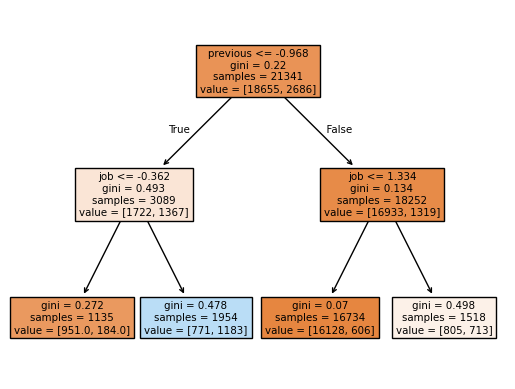

In [100]:
#Plot the improved decision tree
dt2_tree = plot_tree(dt2_pipe.named_steps['decisiontreeclassifier'], feature_names=list(X_train.columns), filled = True)

# **Revised Support Vector Classifier**

In [101]:
#Revised Support Vector Classifier Model
svc2_pipe = make_pipeline(preprocessor2, SVC())
svc2_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'university_degree']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['job', 'default', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('svc', SVC())])

In [102]:
#Define the parameter grid and create a grid search object, optimizing for precision
params = {'svc__kernel': ['rbf', 'sigmoid'],
         'svc__gamma': [.001, 0.1, 1.0],}

svc_grid = GridSearchCV(svc2_pipe, param_grid=params, refit=True)

In [103]:
#Conduct grid search and find best parameters
svc_grid.fit(X_train, y_train)
grid_train_acc = svc_grid.score(X_train, y_train)
grid_test_acc = svc_grid.score(X_test, y_test)

best_params = svc_grid.best_params_
print(best_params)


{'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [197]:
#svc2_pipe = make_pipeline(preprocessor2, SVC(kernel=best_params['svc__kernel'], gamma=best_params['svc__gamma']))

In [104]:
#Fit revised SVC model with best parameters and make predictions, while logging the fit time
svc2_pipe = make_pipeline(preprocessor2, SVC(kernel='rbf', gamma=.1))

start_time = time.time()
svc2_pipe.fit(X_train, y_train)
svc2_train_preds = svc2_pipe.predict(X_train)
svc2_test_preds = svc2_pipe.predict(X_test)
end_time = time.time()
svc2_time_taken = end_time - start_time

print(f'Time taken: {svc2_time_taken}')

#Calculate evaluation metrics
svc2_train_accuracy = accuracy_score(y_train, svc2_train_preds)
svc2_test_accuracy = accuracy_score(y_test, svc2_test_preds)
svc2_precision = precision_score(y_test, svc2_test_preds)

print('Train Accuracy Score:', svc2_train_accuracy)
print('Test Accuracy Score:', svc2_test_accuracy)
print('Precision: ', svc2_precision)
print(classification_report(y_test, svc2_test_preds))


Time taken: 22.484625101089478
Train Accuracy Score: 0.9142495665620167
Test Accuracy Score: 0.9020443861375315
Precision:  0.6942496493688639
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7974
           1       0.69      0.42      0.52      1173

    accuracy                           0.90      9147
   macro avg       0.81      0.70      0.74      9147
weighted avg       0.89      0.90      0.89      9147



## **Summary of revised model results**

In [105]:
#Summary Table of Model Accuracy

res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'Train score': [lr2_train_accuracy, knn2_train_accuracy, dt2_train_accuracy, svc2_train_accuracy],
           'Test score': [lr2_test_accuracy, knn2_test_accuracy, dt2_test_accuracy, svc2_test_accuracy],
            'Precision': [lr2_precision, knn2_precision, dt2_precision, svc2_precision],
           'Average fit time': [lr2_time_taken, knn2_time_taken, dt2_time_taken, svc2_time_taken]}
results2_df = pd.DataFrame(res_dict).set_index('Model')

print(results2_df.shape)

(4, 4)


In [106]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
results2_df.head()

,Train score,Test score,Precision,Average fit time
Model,,,,
Logistic Regression,0.90,0.90,0.68,0.28
KNN,0.92,0.89,0.60,6.60
Decision Tree,0.89,0.89,0.60,0.12
SVC,0.91,0.90,0.69,22.48


## **Findings**
The efforts to improve the models did not yield much predictive benefit, in terms of improving accurate prediction of success. However there are a number of interesting findings about which customers are most likely to say ‘yes’  and which are most likely to say ‘no’, allowing for better targeting of resources, as shown in the summary table below. We can also observe the most effective campaign characteristics and timing.

Customers most likely to say ‘yes’ had the highest level of education, a University degree, were students working towards one, and may have already retired. They had said yes in a previous campaign and spent the longest time with agents on the phone. They were contacted mid-week in the spring or fall at times when the Euribor rate and Consumer Price Index were both high.  

Customers most likely to say ‘no’ had the lowest level of education, basic 4-year, and worked in blue collar or service jobs. They may have said no in a previous campaign or have not been contacted before. They were contacted in spring or fall by telephone during times when the Employee Variation Rate was high.

No other factors significantly impacted the likelihood of success, including other levels of education or types of jobs, age, marital status, or whether the customer held a housing or personal loan. The number of contacts by any campaign did not make a difference, nor did a high level of the Consumer Confidence Index.

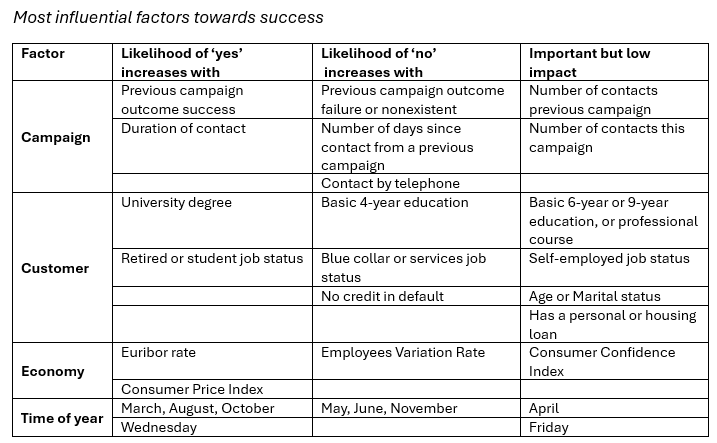


## **Recommendations**
Based on these findings, we recommend the following:

•	Since previous campaigns were one of the most important predictors of success or failure, subsequent campaigns should a)Cultivate deeper loyalty relationships with customers who say ‘yes’ and b) remove customers who said ‘no’ from further contact

•	Since the number of contacts during each campaign did not significantly increase likelihood of success, and each contact has a cost, the number of contacts should be reduced, and reduce contacts by telephone.

•	Strategies targeting University students and retirees will be more successful.

•	Campaigns should be launched when the Euribor rate and Consumer Price Index are both high, and not launched when the Employees Variation Rate is high.

•	The best months to conduct the campaign are March, Augst and October, and the best day to call a customer is Wednesday.



## **Next Steps**
We recommend further data collection and modeling to improve predictions, due to the limited results of this effort. In particular, we need better data about the customer contact itself and specific messaging, since it appears that the agent had a significant influence on the outcome of a call.
